In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
#import seaborn as sns; sns.set()
import os
import random

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [155]:
fname = 'WorksheetAsteroidModel130611.xlsx'
print(fname)

WorksheetAsteroidModel130611.xlsx


In [156]:
df = pd.read_excel(fname,index_col=None,names=['year','day','eventID','lon','lat','diameter'])

In [157]:
df1 = df.sort_values(by='diameter',ascending=False).reset_index().drop(columns='index')

In [158]:
df1 = df1.reset_index()
MaxYear = df1.year.max()
df1['rate'] = (df.index+1)/MaxYear

In [159]:
df1['log_rate'] = np.log10(df1.rate)
df1['log_diameter'] = np.log10(df1.diameter)

In [160]:
[a,b] = np.polyfit(df1.log_diameter,df1.log_rate,1)

In [161]:
def solve_Dmin(ks,dmin,a,b):
    
    Hist_Catalog = pd.DataFrame(columns=['N','Dmin'])
    
    N = 1
    # formula: np.power(N/10^(6+b), 1/a)
    dia = np.power(N/np.power(10.,ks+b),1./a)
    Hist_Catalog=Hist_Catalog.append({'N': N, 'Dmin':dia}, ignore_index=True)
    
    while dia >= dmin:
        N = N + 1
        dia = np.power(N/np.power(10.,ks+b),1./a)
        Hist_Catalog=Hist_Catalog.append({'N': N, 'Dmin':dia}, ignore_index=True)

    return Hist_Catalog

In [91]:
Hist_Catalog = solve_Dmin(5,10,a,b)
Hist_Catalog['log_diameter'] = np.log10(Hist_Catalog.Dmin)
Hist_Catalog['log_rate'] = np.log10(Hist_Catalog.N/1e5)

# test if the function is right by comparing to the example in the slide --> right
example_cat = solve_Dmin(6,10,-2.02181,0.40823)
example_cat.head()

In [92]:
np.random.seed(1)
rds = pd.DataFrame(np.random.uniform(0,1,size=(len(Hist_Catalog.index), 5)), columns=list('ABCDE'))

In [93]:
Catalog = pd.DataFrame(columns=['Year','DOY','Lon','Lat','Diameter'])

In [94]:
#Catalog['Rate'] = Catalog.N/1e5
Catalog['Year'] = round(rds.A*1e5)
Catalog['DOY'] = round(rds.B*365)
Catalog['Lon'] = -180. + 360.*rds.C
Catalog['Lat'] = np.arcsin(2*rds.D-1)/np.pi*180.
Catalog['Diameter']=10.*np.power(rds.E,1./a)

In [95]:
Catalog = Catalog.sort_values(by=['Diameter'],ascending=False).reset_index().drop(columns='index')
Catalog['rate'] = (Catalog.index+1)/1e5
Catalog['log_diameter'] = np.log10(Catalog.Diameter)
Catalog['log_rate'] = np.log10(Catalog.rate)

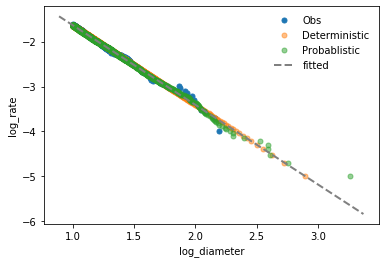

In [147]:
fig,ax=plt.subplots(figsize=(6,4))
df1.plot(x='log_diameter',y='log_rate',linestyle='None',marker='.',markersize=10,label='Obs',ax=ax)
Hist_Catalog.plot(x='log_diameter',y='log_rate',linestyle='None',marker='.',markersize=10,alpha=0.5,label='Deterministic',ax=ax)
Catalog.plot(x='log_diameter',y='log_rate',linestyle='None',marker='.',markersize=10,alpha=0.5,label='Probablistic',ax=ax)
x_min,x_max=ax.get_xlim()
y_min= a*x_min+b
y_max= a*x_max+b
ax.plot([x_min,x_max],[y_min,y_max],linestyle='--',c='grey',linewidth=2,label='fitted')
ax.set_ylabel('log_rate')
ax.legend(frameon=False)
fig.savefig('Q3.png')

In [149]:
Catalog = Catalog.sort_values(by=['Year','DOY'])

In [152]:
Catalog.to_csv('Q3_Catalog.csv',columns=['Year','DOY','Lon','Lat','Diameter'],index=None)